In [ ]:
from string import ascii_uppercase

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
df = pd.read_csv('/content/adult.csv')

In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
df.duplicated().sum()

24

In [ ]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

<Axes: >

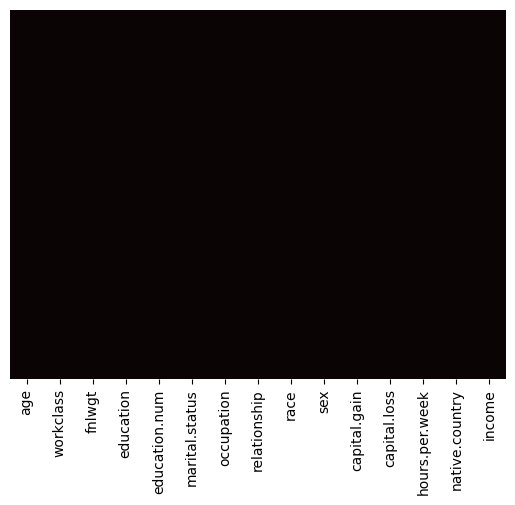

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

In [ ]:
df['income'] = np.where(df['income'] == '>50K', 1, 0)

In [ ]:
column_name = 'income'

# Count occurrences of "Yes" and "No"
count_result = df[column_name].value_counts()

# Display the counts
print("Counts of 'Yes' and 'No':")
print(count_result)

Counts of 'Yes' and 'No':
0    24720
1     7841
Name: income, dtype: int64


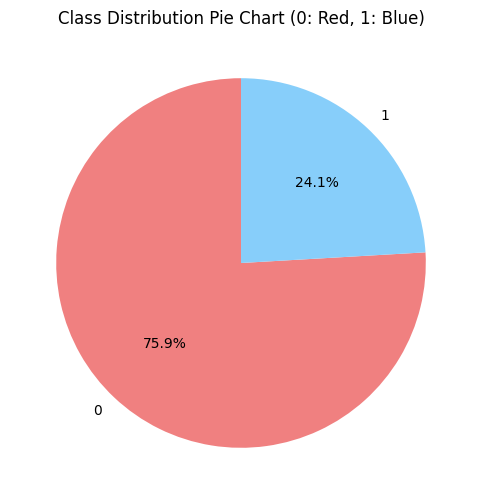

In [ ]:
class_distribution = df['income'].value_counts()

# Plotting a pie chart with different colors for 0 and 1
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Class Distribution Pie Chart (0: Red, 1: Blue)')
plt.show()

In [ ]:
def hist_by(df, column):
    X, y = [], []
    for value in sorted(df[column].unique()):
        X.append(value)
        y.append(df[df[column] == value]['income'].mean() * 100.0)

    index = np.arange(len(X))
    width = 0.35
    plt.bar(index, y, width)
    plt.xticks(index+width/2, X, rotation=70)
    plt.yticks(np.arange(0, 100, 10))
    plt.ylim(0, 100)
    plt.xlabel(column)
    plt.ylabel('Percentage of people who\'s income is above $50K')
    plt.tight_layout()
    plt.show()

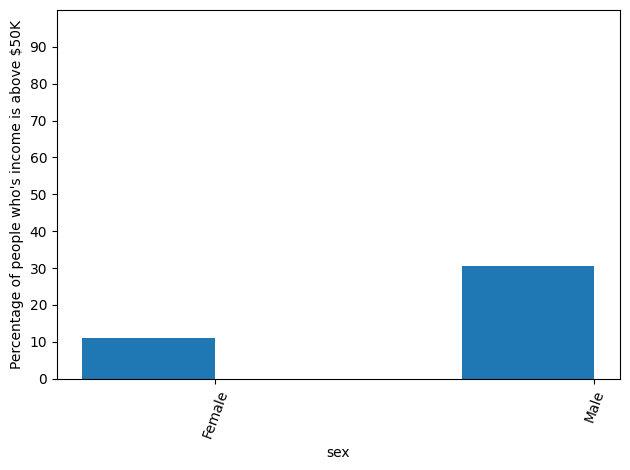

In [ ]:
hist_by(df, 'sex')

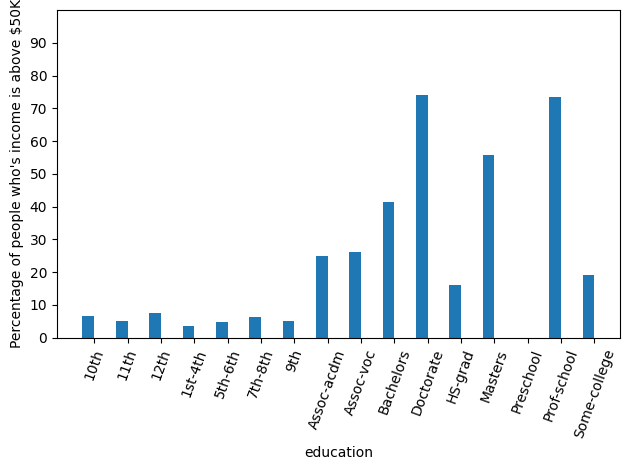

In [ ]:
hist_by(df, 'education')

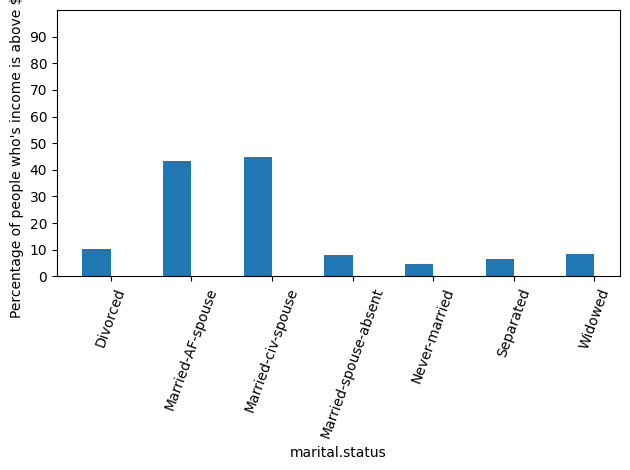

In [ ]:
hist_by(df, 'marital.status')

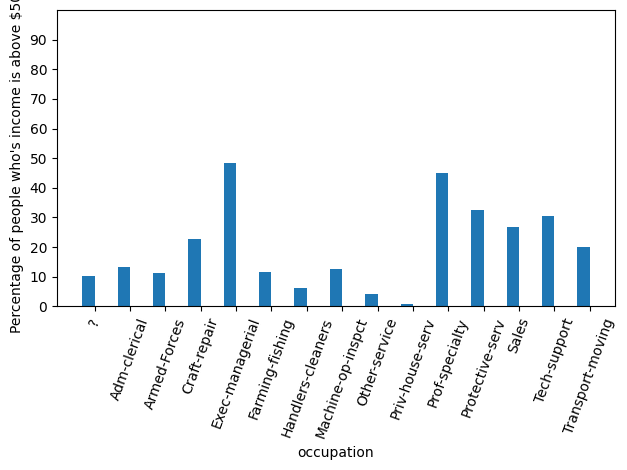

In [ ]:
hist_by(df, 'occupation')

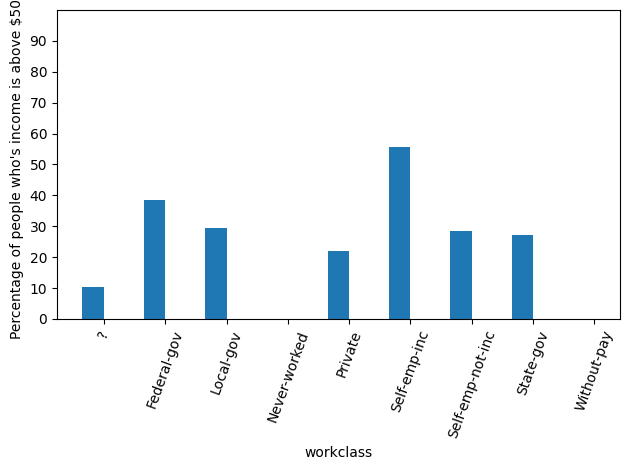

In [ ]:
hist_by(df, 'workclass')

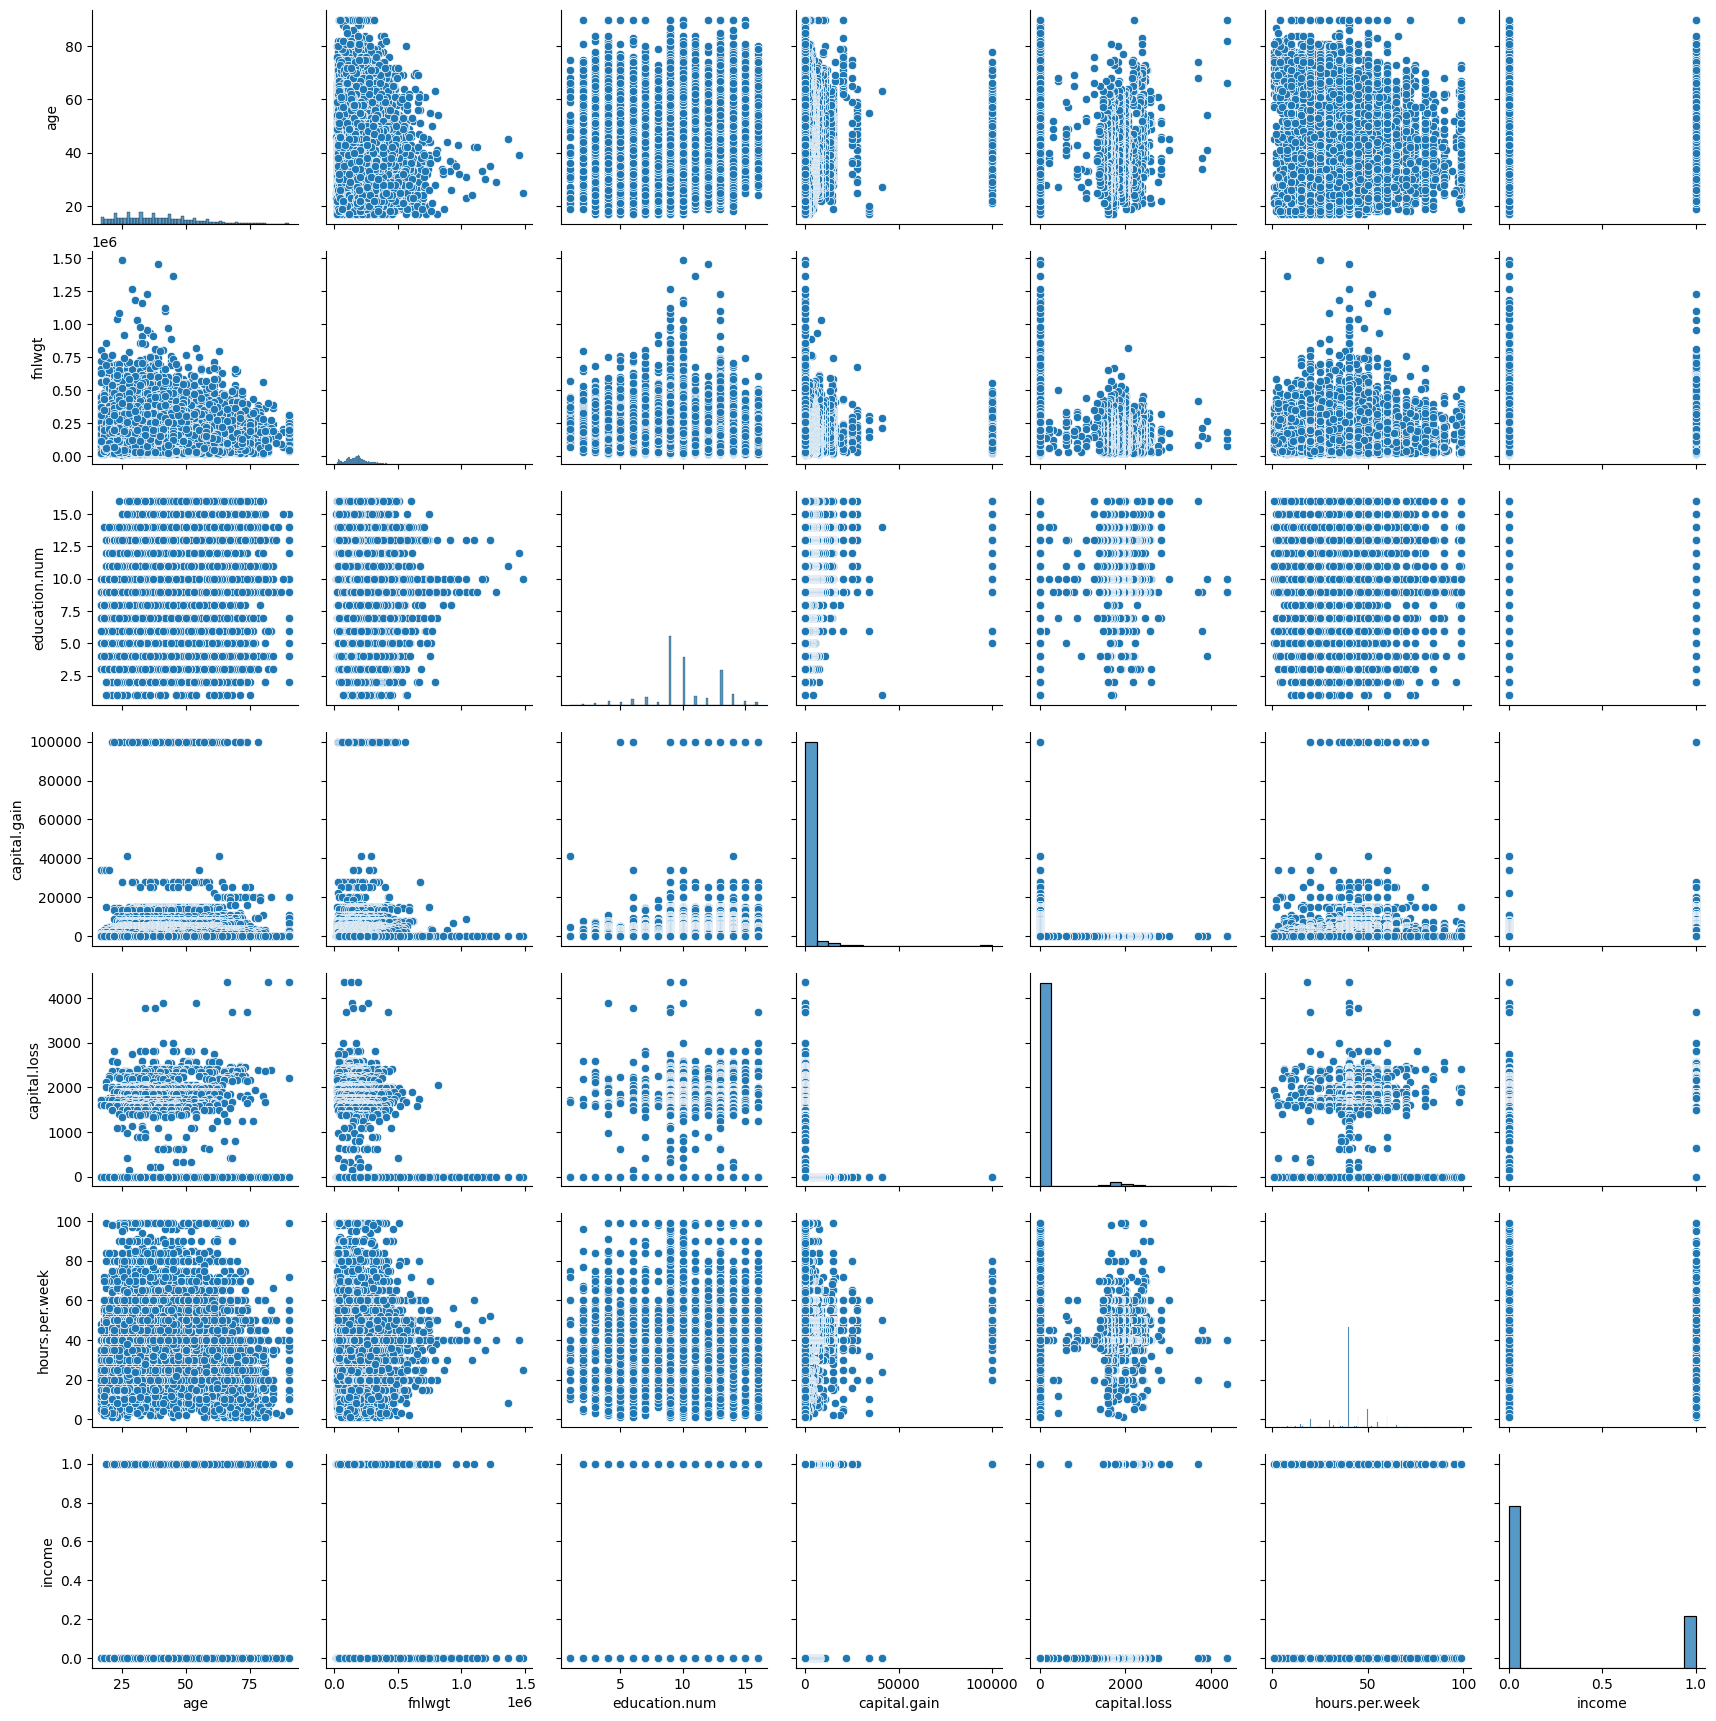

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

<ipython-input-32-b6599c2637c8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


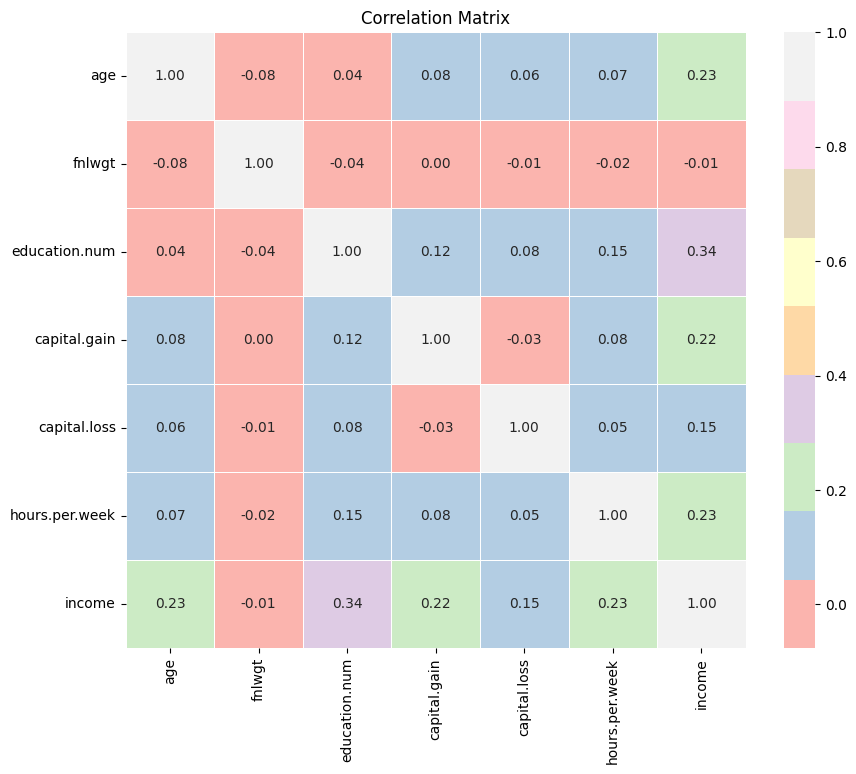

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.drop('fnlwgt',axis=1)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [ ]:
df = df[df['occupation'] != '?']
df = df[df['workclass'] != '?']

In [ ]:
education_dummies = pd.get_dummies(df['education'])
marital_dummies = pd.get_dummies(df['marital.status'])
relationship_dummies = pd.get_dummies(df['relationship'])
sex_dummies = pd.get_dummies(df['sex'])
occupation_dummies = pd.get_dummies(df['occupation'])
native_dummies = pd.get_dummies(df['native.country'])
race_dummies = pd.get_dummies(df['race'])
workclass_dummies = pd.get_dummies(df['workclass'])

In [ ]:
marital_dummies.head()

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0


In [ ]:
def into_bins(column, bins):
    group_names = list(ascii_uppercase[:len(bins)-1])
    binned = pd.cut(column, bins, labels=group_names)
    return binned

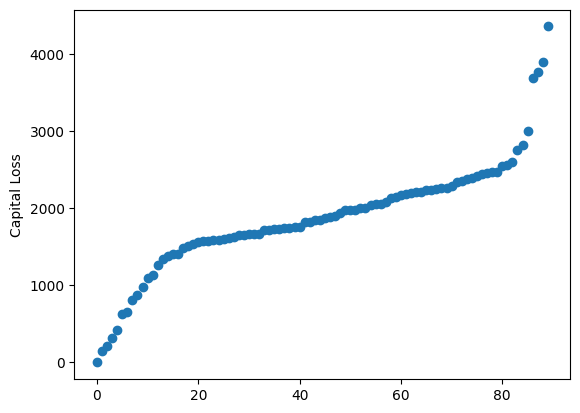

In [ ]:
unique = sorted(df['capital.loss'].unique())
plt.scatter(range(len(unique)), unique)
plt.ylabel('Capital Loss')
plt.tick_params(axis='x', which='both', labelbottom='off', bottom='off') # disable x ticks
plt.show()

In [ ]:
loss_bins = into_bins(df['capital.loss'], list(range(-1, 4500, 500)))
loss_dummies = pd.get_dummies(loss_bins)

In [ ]:
df['capital.gain'].describe()

count    30718.000000
mean      1106.037079
std       7497.863364
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

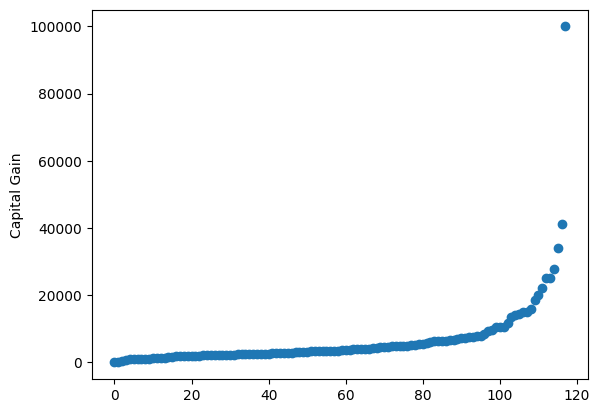

In [ ]:
unique = sorted(df['capital.gain'].unique())
plt.scatter(range(len(unique)), unique)
plt.ylabel('Capital Gain')
plt.tick_params(axis='x', which='both', labelbottom='off', bottom='off')
plt.show()

In [ ]:
gain_bins = into_bins(df['capital.gain'], list(range(-1, 42000, 5000)) + [100000])
gain_dummies = pd.get_dummies(gain_bins)

In [ ]:
X = pd.concat([df[['age', 'hours.per.week']], gain_dummies, occupation_dummies, workclass_dummies, education_dummies, marital_dummies, race_dummies, sex_dummies], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Convert back to DataFrame if needed
X_train = pd.DataFrame(X_resampled, columns=X_train.columns)
y_train = pd.DataFrame(y_resampled, columns=['income'])

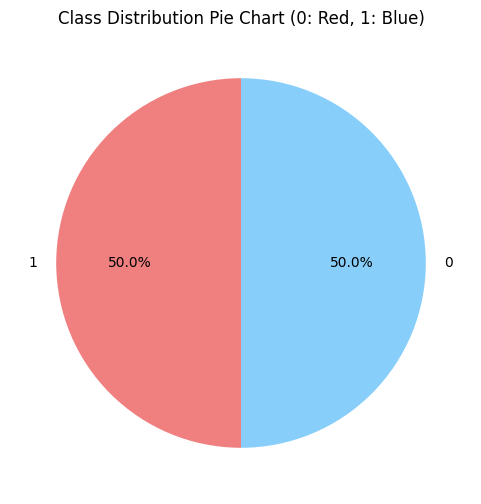

In [ ]:
class_distribution = y_train['income'].value_counts()

# Plotting a pie chart with different colors for 0 and 1
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Class Distribution Pie Chart (0: Red, 1: Blue)')
plt.show()

In [ ]:
clf = AdaBoostClassifier(random_state=1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=1)

In [ ]:
y_pred = clf.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_pred, y_test)))

Accuracy: 0.8053385416666666


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[1827  472]
 [ 126  647]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      2299
           1       0.58      0.84      0.68       773

    accuracy                           0.81      3072
   macro avg       0.76      0.82      0.77      3072
weighted avg       0.85      0.81      0.82      3072



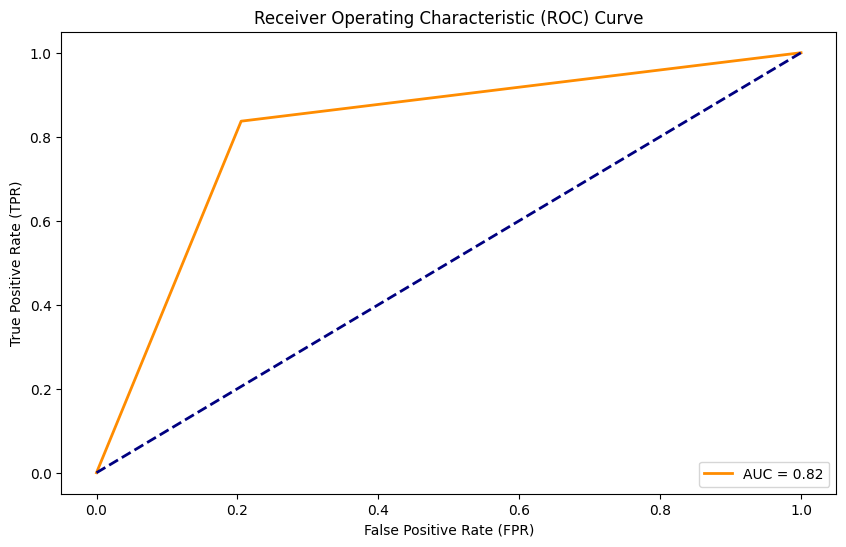

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
X_train.columns

Index(['age', 'hours.per.week', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
       'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving', 'Federal-gov', 'Local-gov',
       'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov',
       'Without-pay', '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th',
       '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college', 'Divorced',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander', 'Black', 'Other', 'White', 'Female', 'Male'],
      dtype='object')

In [ ]:
X_train

,age,hours.per.week,A,B,C,D,E,F,G,H,...,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,36,40,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,23,40,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,30,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,35,40,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,21,32,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41533,33,40,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
41534,44,32,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
41535,42,40,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
41536,34,45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [ ]:
X_train.shape
y_train.shape

(41538, 1)

In [ ]:
X_train = X_train[:500]
y_train = y_train[:500]
X_test = X_train[:200]
y_test = y_train[:200]

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

class AdaBoostClassifierCustom:
    def __init__(self, n_estimators=500, random_state=None):
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.models = []
        self.alphas = []
        self.classes = None

    def fit(self, X, y):
        m, n = X.shape
        self.classes = np.unique(y)

        # Initialize to a large value
        min_error = m
        best_feature = None
        best_threshold = None
        best_polarity = None

        # Initial weights (uniform distribution)
        weights = np.ones((m,)) / m

        for _ in range(self.n_estimators):
            # Create and train a weak learner (here, a simple decision stump)
            model = DecisionStump()
            model.fit(X, y, weights)

            # Make predictions
            predictions = model.predict(X)

            # Calculate weighted error
            err = np.sum(weights * (predictions != y))

            # Calculate model weight (alpha)
            alpha = 0.5 * np.log((1 - err) / max(err, 1e-10))
            self.models.append((model, alpha))

            # Update sample weights
            weights *= np.exp(-alpha * y.flatten() * predictions)
            weights /= np.sum(weights)

            self.alphas.append(alpha)

    def predict(self, X):
        # Combine predictions from all weak learners
        predictions = np.zeros((X.shape[0], len(self.classes)))
        for model, alpha in self.models:
            model_predictions = alpha * model.predict(X)
            predictions += model_predictions[:, None]  # Add None to reshape to (n_samples, 1, n_classes)

        return np.argmax(predictions, axis=1)


class DecisionStump:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.polarity = None
        self.classes = None

    def fit(self, X, y, weights):
        m, n = X.shape
        self.classes = np.unique(y)

        # Initialize to a large value
        min_error = m
        best_feature = None
        best_threshold = None
        best_polarity = None

        for feature in range(n):
            # Sort the feature values
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                for polarity in [1, -1]:
                    predictions = np.ones(m)
                    predictions[polarity * X[:, feature] < polarity * threshold] = -1

                    # Calculate weighted error
                    err = np.sum(weights * (predictions != y))

                    if err < min_error:
                        min_error = err
                        best_feature = feature
                        best_threshold = threshold
                        best_polarity = polarity

        if best_feature is not None:
            self.feature_index = best_feature
            self.threshold = best_threshold
            self.polarity = best_polarity

    def predict(self, X):
        predictions = np.ones(X.shape[0])
        if self.feature_index is not None:
            predictions[X[:, self.feature_index] < self.threshold] = -1
        return predictions

ada_custom = AdaBoostClassifierCustom(n_estimators=500, random_state=1)
ada_custom.fit(X_train, y_train)
y_pred_custom = ada_custom.predict(X_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f'Accuracy (Custom AdaBoost): {accuracy_custom}')


<ipython-input-55-7d18be93cb77>:37: RuntimeWarning: invalid value encountered in log
  alpha = 0.5 * np.log((1 - err) / max(err, 1e-10))


Accuracy (Custom AdaBoost): 0.74


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

conf_matrix = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_custom)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[148   0]
 [ 52   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       148
           1       0.00      0.00      0.00        52

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.55      0.74      0.63       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


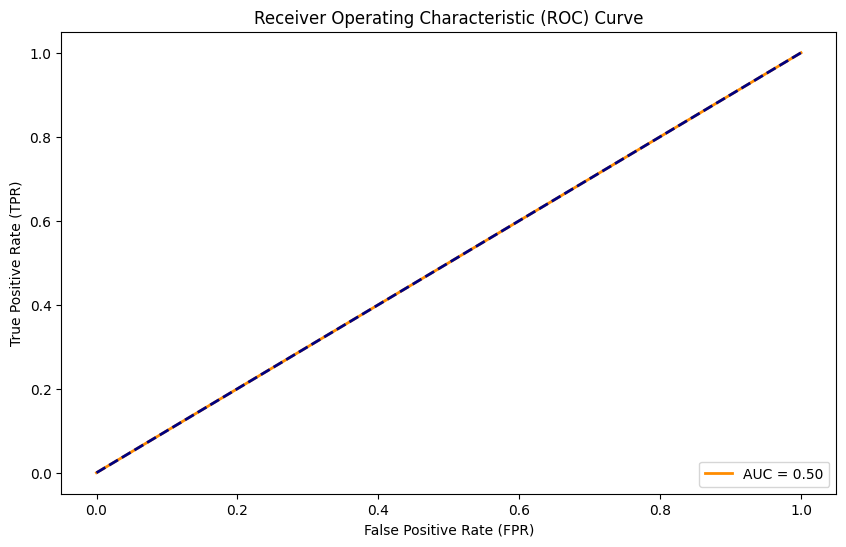

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_custom)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#running without balancing


# import numpy as np

# class AdaBoostClassifierCustom:
#     def __init__(self, n_estimators=500, random_state=None):
#         self.n_estimators = n_estimators
#         self.random_state = random_state
#         self.models = []
#         self.alphas = []

#     def fit(self, X, y):
#         np.random.seed(self.random_state)
#         m, n = X.shape
#         classes = np.unique(y)
#         num_classes = len(classes)
#         weights = np.ones((m, num_classes)) / m
#         self.models = []
#         self.alphas = []

#         for _ in range(self.n_estimators):
#             # Create and train a weak learner (here, a simple decision stump)
#             model = DecisionStump()
#             model.fit(X, y, weights)

#             # Make predictions
#             predictions = model.predict(X)

#             # Calculate weighted error
#             err = np.sum(weights * (predictions != y[:, None]))

#             # Calculate model weight (alpha)
#             alpha = 0.001
#             # alpha = 0.5 * np.log((1 - err) / max(err, 1e-10))
#             self.models.append((model, alpha))

#             # Update sample weights
#             weights *= np.exp(-alpha * y[:, None] * predictions)
#             weights /= np.sum(weights, axis=1)[:, None]

#             self.alphas.append(alpha)

#     def predict(self, X):
#         # Combine predictions from all weak learners
#         predictions = np.zeros((X.shape[0], len(self.models[0][0].classes)))
#         for model, alpha in self.models:
#             predictions += alpha * model.predict(X)

#         return np.argmax(predictions, axis=1)


# class DecisionStump:
#     def __init__(self):
#         self.feature_index = None
#         self.threshold = None
#         self.polarity = None
#         self.classes = None

#     def fit(self, X, y, weights):
#         m, n = X.shape
#         self.classes = np.unique(y)

#         # Initialize to a large value
#         min_error = m
#         best_feature = None
#         best_threshold = None
#         best_polarity = None

#         for feature in range(n):
#             # Sort the feature values
#             thresholds = np.unique(X[:, feature])
#             for threshold in thresholds:
#                 for polarity in [1, -1]:
#                     predictions = np.ones((m, len(self.classes)))
#                     predictions[polarity * X[:, feature] < polarity * threshold, :] = -1

#                     # Calculate weighted error
#                     err = np.sum(weights * (predictions != y[:, None]))

#                     # Update the decision stump if this threshold gives a lower error
#                     if err < min_error:
#                         min_error = err
#                         best_feature = feature
#                         best_threshold = threshold
#                         best_polarity = polarity

#         # Update the decision stump if there was an improvement
#         if best_feature is not None:
#             self.feature_index = best_feature
#             self.threshold = best_threshold
#             self.polarity = best_polarity

#     def predict(self, X):
#         # Make predictions based on the decision stump
#         predictions = np.ones((X.shape[0], len(self.classes)))
#         if self.feature_index is not None:
#             predictions[X[:, self.feature_index] < self.threshold, :] = -1
#         return predictions


# ada_custom = AdaBoostClassifierCustom(n_estimators=500, random_state=1)
# ada_custom.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred_custom = ada_custom.predict(X_test)

# # Evaluate the model accuracy
# accuracy_custom = accuracy_score(y_test, y_pred_custom)
# print(f'Accuracy (Custom AdaBoost): {accuracy_custom}')
